In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
# Read in the data . parquet file
df = pd.read_parquet('daily_weather.parquet')
df.head()

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
0,41515,Asadabad,1957-07-01,Summer,27.0,21.1,35.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,41515,Asadabad,1957-07-02,Summer,22.8,18.9,32.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,41515,Asadabad,1957-07-03,Summer,24.3,16.7,35.6,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,41515,Asadabad,1957-07-04,Summer,26.6,16.1,37.8,4.1,NaN,NaN,NaN,NaN,NaN,NaN
4,41515,Asadabad,1957-07-05,Summer,30.8,20.0,41.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# drop avg_temp_c NA
df = df.dropna(subset=['avg_temp_c'])
df = df.dropna(subset=['min_temp_c'])

In [18]:
df.shape

(17831891, 16)

### Benchmark Rendering Time
Create a scatter plot and benchmark the rendering time for varying input data sizes.

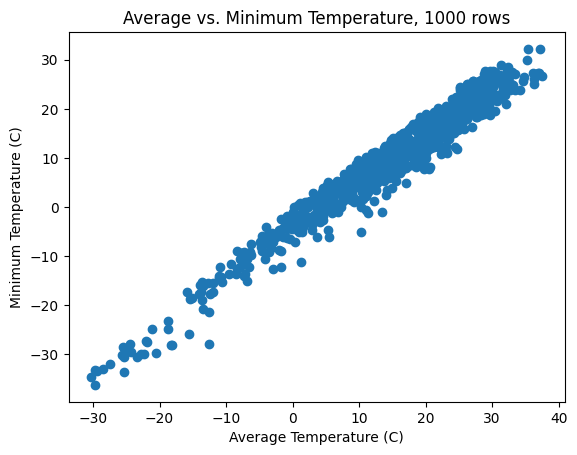

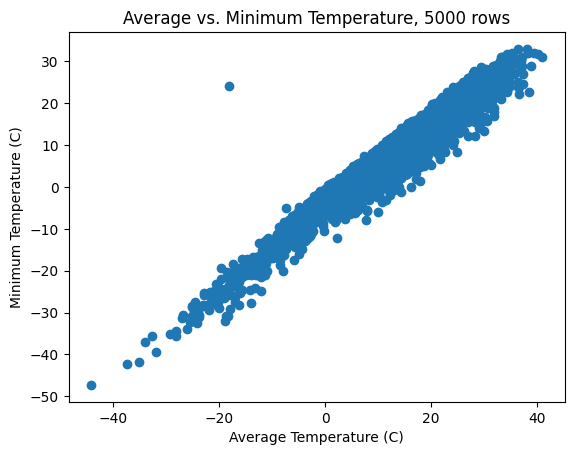

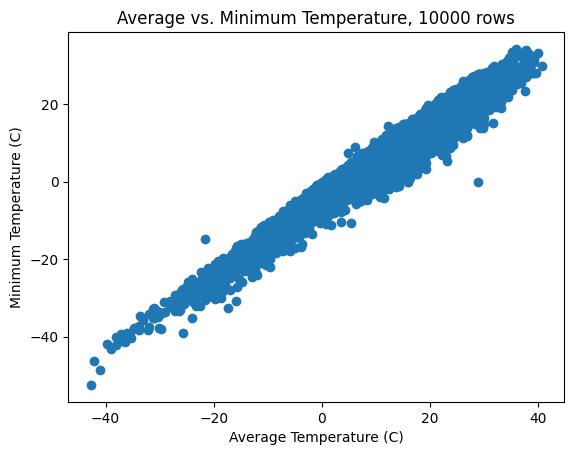

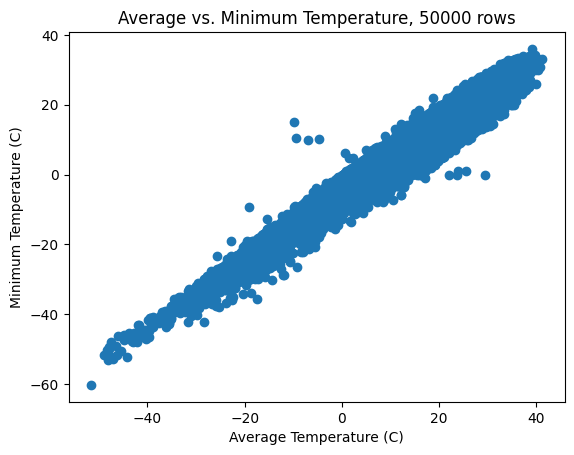

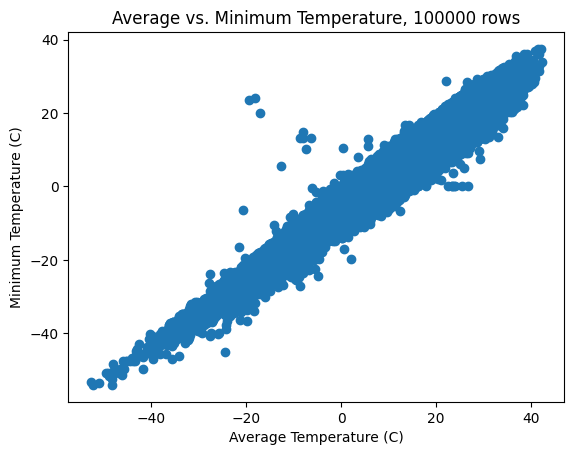

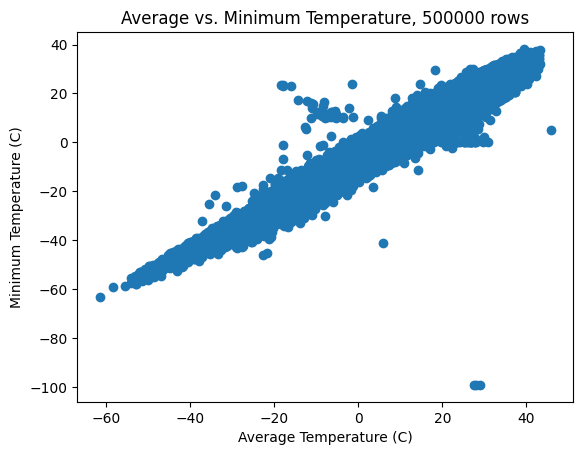

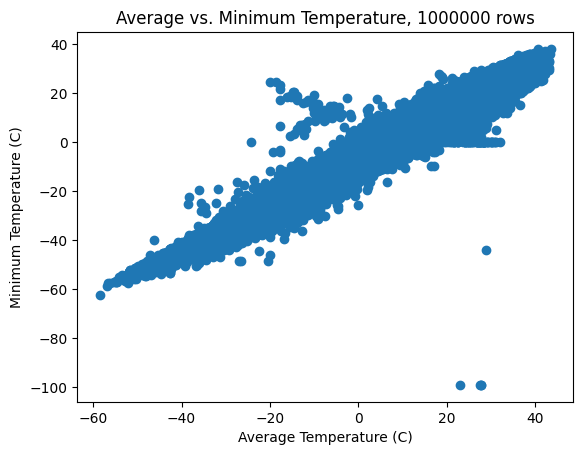

In [30]:
# Define data sizes to test
data_sizes = [1000, 5000, 10000, 50000, 100000, 500000, 1000000]

# Benchmark rendering time for a scatter plot
scatter_plot_times = []
for size in data_sizes:
    subset = df.sample(n=size)
    start_time = time.time()
    plt.scatter(subset['avg_temp_c'], subset['min_temp_c'])
    plt.xlabel('Average Temperature (C)')
    plt.ylabel('Minimum Temperature (C)')
    plt.title('Average vs. Minimum Temperature, {} rows'.format(size))
    plt.show()
    end_time = time.time()
    scatter_plot_times.append(end_time - start_time)

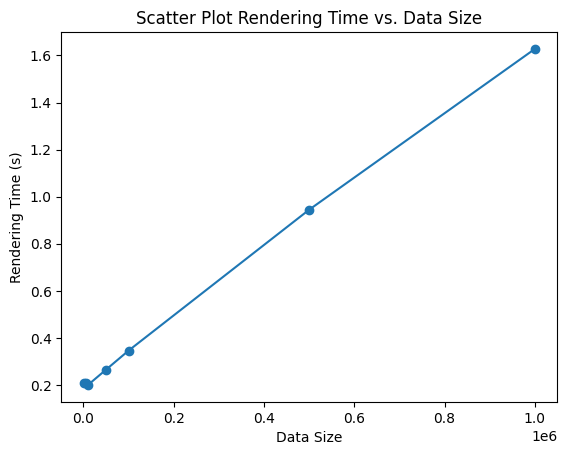

In [31]:
# plot the scatter_plot_times in a line chart
plt.plot(data_sizes, scatter_plot_times, marker='o')
plt.xlabel('Data Size')
plt.ylabel('Rendering Time (s)')
plt.title('Scatter Plot Rendering Time vs. Data Size')
plt.show()

## Animated Transitions